***回顾***


由于把数值当成离散值，用频率估计概率P(x)的方法欠妥，考虑用其他方法估计P(x)和P(x|y)



---






### 核密度估计（KDE）


- **定义**：
是用于估计概率密度函数的非参数方法


思路：通过核函数将每个数据点的数据+带宽当作核函数的参数，得到N个核函数，再线性叠加就形成了核密度的估计函数，归一化后就是概率密度函数了


- **公式**：
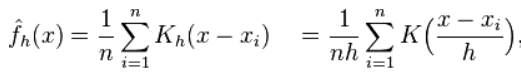
>f为概率密度函数
>K（.）为核函数 


- **具体代码**：

In [ ]:
from sklearn.neighbors import kde


def h1decision(b):
    """
    计算带宽
    
    参数：
        b {ndarray}  一维数组
    
    返回值：
        res {int}   这组数据带宽
    """
    # 这里使用样本标准差
    a1 = np.std(b,ddof=1)
    l = len(b)
    tmp = math.pow(l,-0.2)
    res = 1.05*a1*tmp
    return res


nyse2 = pd.read_excel('ab.xlsx', usecols=[1])
b = use.dTl(nyse2)  # df-->ndarray
b1 = nyse2.values  # 二维数组
h3 = use.h1decision(b)  # 带宽

logpy = kde.KernelDensity(kernel='gaussian', bandwidth=h3).fit(b1).score_samples(b1)

>a.score_samples(X)
>>返回的是点x对应概率的log值(计算模型下的总log概率)，要使用exp求指数还原


>带宽选择 h = c * N^(-1/5)
>> 对正态分布 c = 1.05 * 标准差，作为参考值


- **归一化处理**
目的：kde函数是N个核函数线性叠加的结果，为了保证得出P(X)的取值在(0~1)内。



    代码如下：

In [ ]:
def minmax(X):
    """
    最大最小值标准化【0，1】
    :param X: 需要标准化的二维数组ndarray
    :return: res :标准化后的一维数组ndarray
    """
    x = X.reshape(len(X), 1)
    min_max_scale = preprocessing.MinMaxScaler(feature_range=(0.00000000001, 1))
    tmp = min_max_scale.fit_transform(x)
    res = tmp.flatten()
    return res


----


***计算结果***

1. 分子依旧采用互信息（保留小数点后4位）方式计算
2. 分母熵使用kde进行计算后，最后标准化熵值


问题：
1.对称不确定性计算不严谨：
分子采用离散化，分母采用KDE计算


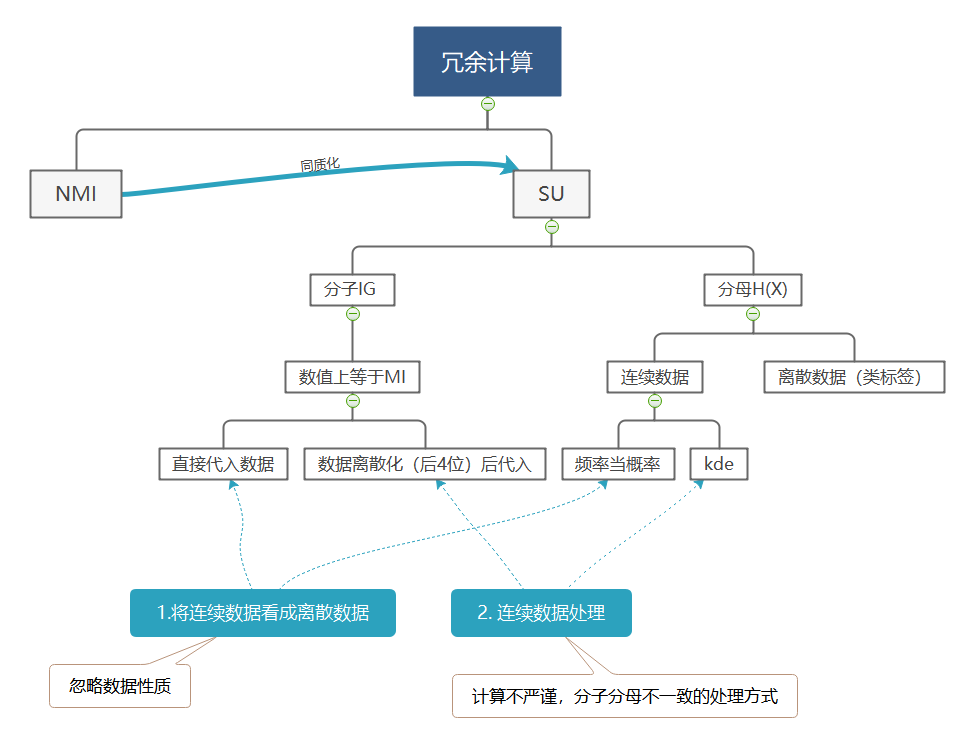



----


***改进方向***

1. 分子分母都同时使用离散后的数据
>用kde2d计算联合概率p(x,y)   (放弃)
2. 分子分母都使用KDE计算